In [1]:
%pylab inline
from time import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read a file in from S3 containing a edges of the California road network.
# Each row in the file is tab separated representing an edge connecting 
# two intersections e.g. id1 id2
rdd = sc.textFile("s3n://roadnet/roadNet-CA.txt")\
        .map(lambda r: r.split("\t"))\
        .repartition(18)
rdd.take(5)

[[u'438', u'20655'],
 [u'33468', u'437'],
 [u'33468', u'33467'],
 [u'33468', u'33469'],
 [u'33468', u'39690']]

In [3]:
# Count the number of edges leaving from each intersection representing each node's degree.
node_degree = rdd.mapValues(lambda x: 1)\
                 .reduceByKey(lambda x,y: x+y)
node_degree.take(5)

[(u'510875', 3),
 (u'684231', 2),
 (u'378460', 4),
 (u'1527198', 3),
 (u'1231466', 4)]

In [4]:
# Calculate a histogram of the degrees per node and bring the RDD to the driver node as a list of tuples
degree_distr = node_degree.map(lambda r: (r[1], 1))\
                          .reduceByKey(lambda x,y: x+y)
degree_distr_arr = degree_distr.collect()
degree_distr_arr

[(1, 321027),
 (2, 204754),
 (3, 971276),
 (4, 454208),
 (5, 11847),
 (6, 1917),
 (7, 143),
 (8, 30),
 (9, 1),
 (10, 2),
 (12, 1)]

In [5]:
# Assign the degree and frequency variables
degree = [val[0] for val in degree_distr_arr]
frequency = [val[1] for val in degree_distr_arr]

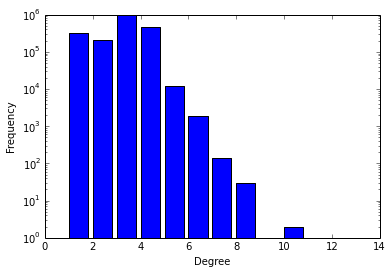

In [6]:
# plot the histogram of the frequency of each degree per node in the network
bar(degree, frequency, log=1)
plt.xlabel('Degree')
plt.ylabel('Frequency')